In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-sentiment-analysis/data.csv


In [9]:

import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

df = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')



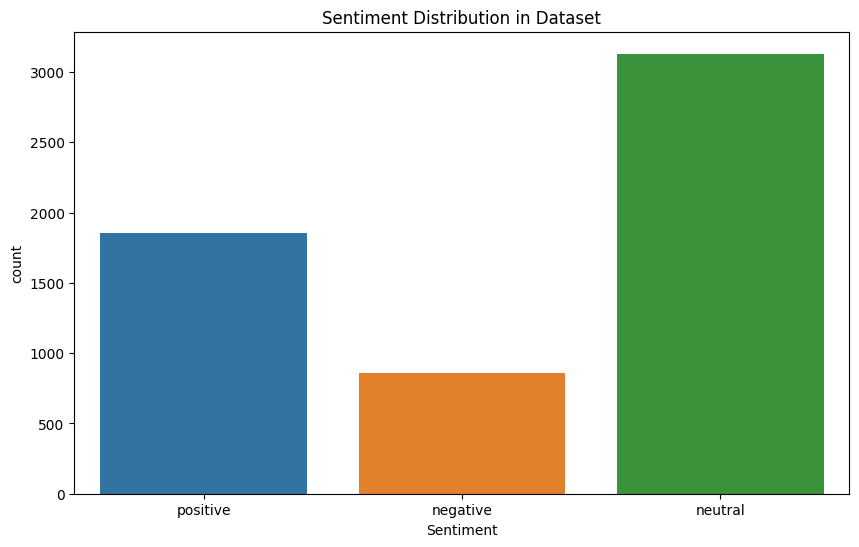

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot( x='Sentiment', data = df)
plt.title('Sentiment Distribution in Dataset')
plt.show()

In [17]:
# Let's preprocess our text

model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('cif', LogisticRegression(class_weight = 'balanced'))
])

# Train-test split
X = df['Sentence']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [18]:
# Let's train our model and get some predictions 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
# Let's evaluate our predictions
print(f"Accuracy: {accuracy_score(y_test,y_pred):.2f}")
print("n\ Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
n\ Classification Report:
              precision    recall  f1-score   support

    negative       0.42      0.48      0.45       269
     neutral       0.77      0.75      0.76       925
    positive       0.75      0.73      0.74       559

    accuracy                           0.71      1753
   macro avg       0.65      0.66      0.65      1753
weighted avg       0.71      0.71      0.71      1753



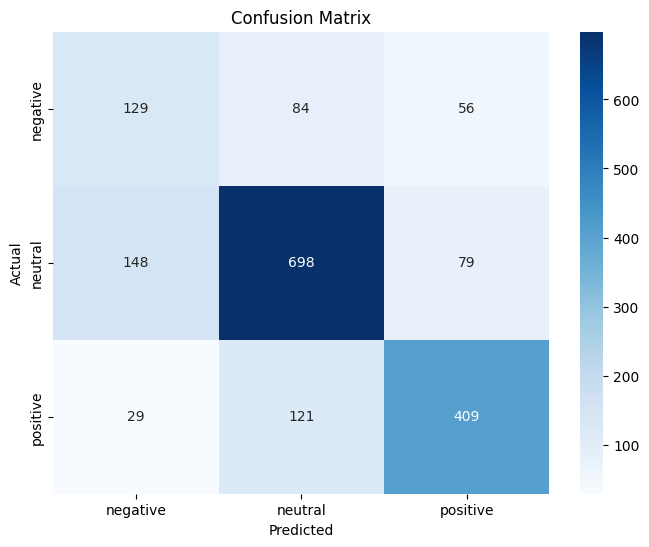

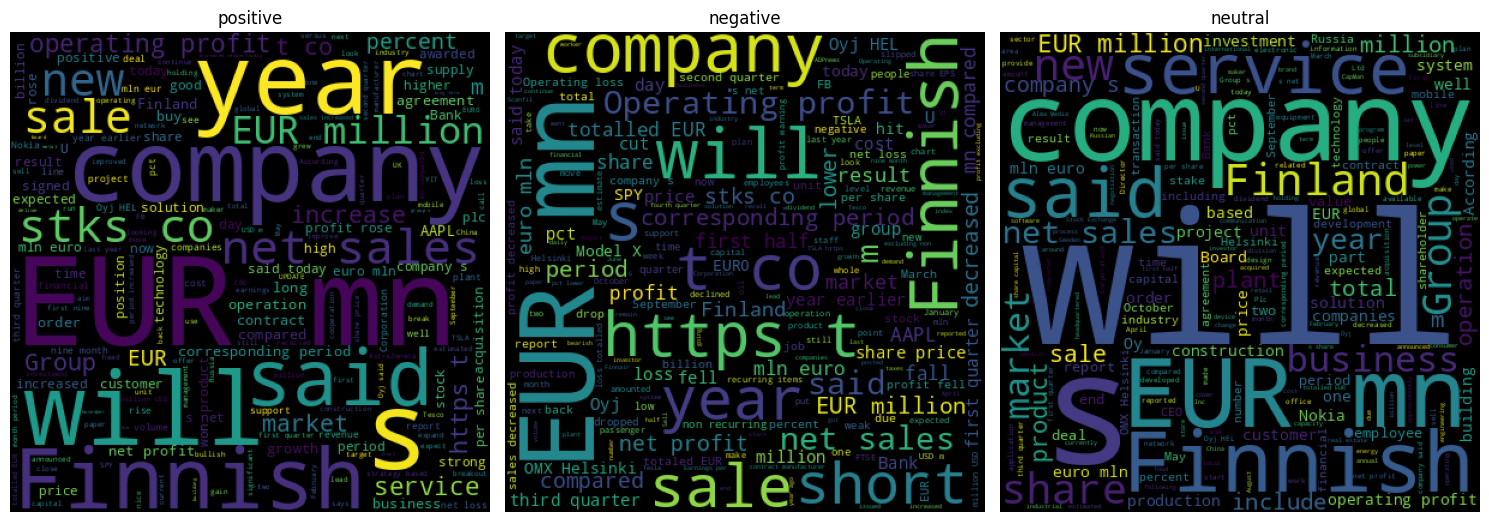

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
           xticklabels = model.classes_,
           yticklabels = model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Word cloud for each sentiment
sentiments = ['positive', 'negative', 'neutral']
plt.figure(figsize=(15,10))
for i, sentiment in enumerate(sentiments):
    plt.subplot(1,3,i+1)
    text = ''.join(df[df['Sentiment']== sentiment]['Sentence'])
    wordcloud = WordCloud(width = 400, height = 400).generate(text)
    plt.imshow(wordcloud)
    plt.title(sentiment)
    plt.axis('off')


plt.tight_layout()
plt.show()